<a href="https://colab.research.google.com/github/BBOMS9105/humanPython/blob/main/python230320.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
##구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/data/'

In [91]:
#데이터 불러오기
google = pd.read_csv(DATA_PATH + 'google.csv')
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [8]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


## 날짜 데이터 타입 배우기 

In [11]:
import pandas as pd
from datetime import datetime
time_stamp = pd.Timestamp(datetime(2023, 3, 20))
time_stamp

Timestamp('2023-03-20 00:00:00')

In [12]:
pd.Timestamp('2023-03-23')

Timestamp('2023-03-23 00:00:00')

- 몇가지 옵션 확인

In [17]:
# 연도추출
ts = pd.Timestamp('2023-03-23')
ts.year

2023

In [18]:
ts.month

3

In [19]:
ts.day

23

In [21]:
ts.dayofweek

3

In [24]:
#요일
ts.day_name()

'Thursday'

## pd.Period


In [25]:
tmp_period = pd.Period('2023-03')
tmp_period

Period('2023-03', 'M')

In [26]:
# 캘린더 데이
# 비스니스 데이
tmp_period.asfreq('D')


Period('2023-03-31', 'D')

In [27]:
tmp_period.to_timestamp().to_period('M')

Period('2023-03', 'M')

## 임의의 시계열 데이터 생성

In [28]:
index = pd.date_range(start='2023-01-01', periods = 12, freq='M')
index

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [31]:
#데이터프레임으로 변환
result = pd.DataFrame({'date' : index})
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


In [35]:
#반복문 문제

day_7 = pd.date_range('2023-3-20', periods = 7)
day_7

# 반복문을 활용해서 dayofweek, day_name()을 활용해서
# 예시출력
# 0 Monday
# 1 Tuesday

DatetimeIndex(['2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23',
               '2023-03-24', '2023-03-25', '2023-03-26'],
              dtype='datetime64[ns]', freq='D')

In [53]:
dates = pd.date_range(start = '2023-3-20', periods = 7)
for date in dates:
  print(date.dayofweek, date.day_name())

0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday
6 Sunday


- 날짜 데이터를 객체로 변환하면 year, month등 편하게 사용가능
- object를 날짜 데이터 객체로 변환

In [59]:
google['Date'] = pd.to_datetime(google['Date'])
google.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [60]:
google2 = google.copy()
google2 = google.set_index('Date')
google2.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [61]:
google2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


<Axes: title={'center': 'Stock Price'}, xlabel='Date'>

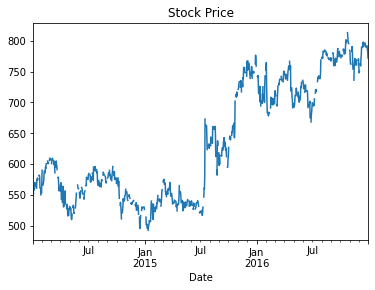

In [62]:
google2['Close'].plot(title = 'Stock Price')

## indexing

In [64]:
google2.loc['2015'].head()

,Close
Date,
2015-01-01,NaN
2015-01-02,524.81
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,513.87


In [66]:
# 2015-03 ~ 2015-08
google2.loc['2015-03':'2015-08'].head()

,Close
Date,
2015-03-01,NaN
2015-03-02,571.34
2015-03-03,573.64
2015-03-04,573.37
2015-03-05,575.33


- 특정한 날짜의 종가 구하기

In [68]:
google2.loc['2016-06-02', 'Close']

730.4

In [69]:
# 캘린더 데이, 비즈니스 데이
google2.asfreq('D').head() # 캘린더 데이

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [70]:
google2.asfreq('B').head() # 비즈니스 데이

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [73]:
yahoo = pd.read_csv(DATA_PATH + 'yahoo.csv')
yahoo['date'] = pd.to_datetime(yahoo['date'])
yahoo = yahoo.set_index('date')
yahoo

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66
...,...
2015-12-25,NaN
2015-12-28,33.60
2015-12-29,34.04


In [75]:
result1 = yahoo.loc['2013', ['price']].reset_index(drop=True)
result1 = result1.rename(columns = {'price' : '2013'})

result2 = yahoo.loc['2014', ['price']].reset_index(drop=True)
result2 = result2.rename(columns = {'price' : '2014'})

result3 = yahoo.loc['2015', ['price']].reset_index(drop=True)
result3 = result3.rename(columns = {'price' : '2015'})

final_result = pd.concat([result1, result2, result3], axis = 1)
final_result

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59
...,...,...,...
256,40.65,NaN,NaN
257,40.49,50.86,33.60
258,40.20,50.53,34.04
259,40.44,51.22,33.37


In [84]:
years = ['2013', '2014', '2015']
results = []

for year in years:
    result = yahoo.loc[year, ['price']].reset_index(drop=True)
    result = result.rename(columns={'price': year})
    results.append(result)

final_result = pd.concat(results, axis=1)

final_result

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59
...,...,...,...
256,40.65,NaN,NaN
257,40.49,50.86,33.60
258,40.20,50.53,34.04
259,40.44,51.22,33.37


## Matplotlib 설치


In [87]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- 런타임 재시작

In [88]:
import matplotlib as mpl
print(mpl.__version__)

3.7.1


In [92]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

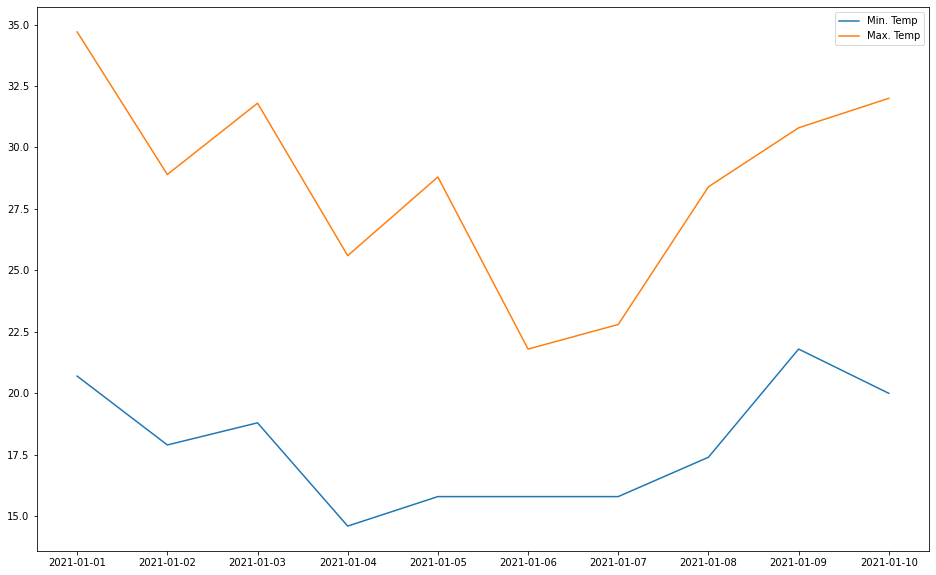

In [99]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16, 10))
#내부 시각화 코드
ax.plot(dates, min_temperature, label = 'Min. Temp') # 라인 그래프
ax.plot(dates, max_temperature, label = 'Max. Temp') # 라인 그래프
ax.legend() # 범례
plt.show()

## 주가 데이터 불러오기


In [100]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 130.0 MB/s eta 0:00:00


In [134]:
import yfinance as yf

data = yf.download("AAPL", start="2021-10-01", end = "2023-03-17")
data = yf.download("TSLA", start="2021-10-01", end = "2023-03-17")
tsla.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Date
2021-10-01    258.406677
2021-10-04    260.510010
2021-10-05    260.196655
2021-10-06    260.916656
2021-10-07    264.536682
Name: Close, dtype: float64

In [140]:
aapl_close = data['Close']
tsla = data['Close']
tsla.head()

Date
2021-10-01    258.406677
2021-10-04    260.510010
2021-10-05    260.196655
2021-10-06    260.916656
2021-10-07    264.536682
Name: Close, dtype: float64

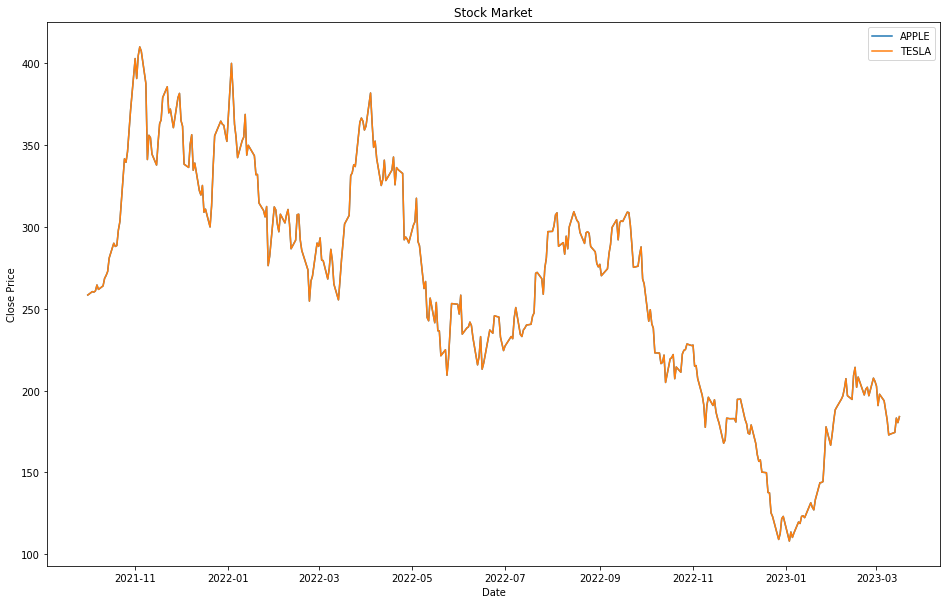

In [137]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16, 10))
#내부 시각화 코드
ax.plot(aapl_close, label = "APPLE")
ax.plot(tsla, label = "TESLA") # 라인 그래프
ax.legend() # 범례
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('Stock Market')
plt.savefig("apple")
plt.show()

## 막대그래프

<BarContainer object of 12 artists>


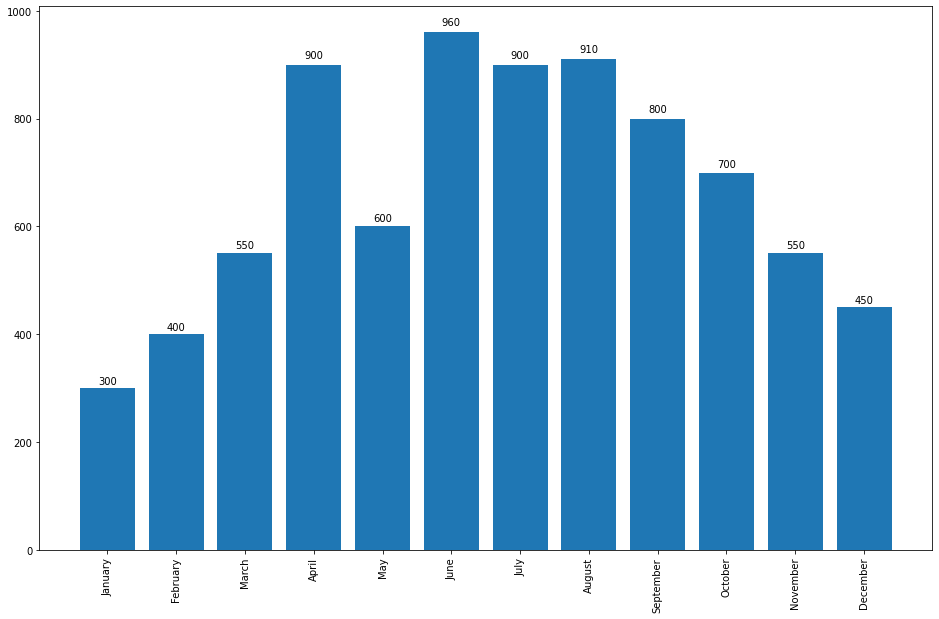

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sold_list = [300, 400, 550, 900, 600, 960, 900, 910, 800, 700, 550, 450]

# 막대 그래프
fig, ax = plt.subplots(figsize = (16, 10))
barplots = ax.bar(month_list, sold_list) 
print(barplots)
for rect in barplots:
  #print(type(rect), rect)
  height = rect.get_height()
  #print(height)
  ax.text(rect.get_x() + rect.get_width()/2, 1.01 *height, height, ha = 'center', va = 'bottom')
  plt.xticks(month_list, calendar.month_name[1:13], rotation=90)
plt.show()

히스토그램 & 수직그래프

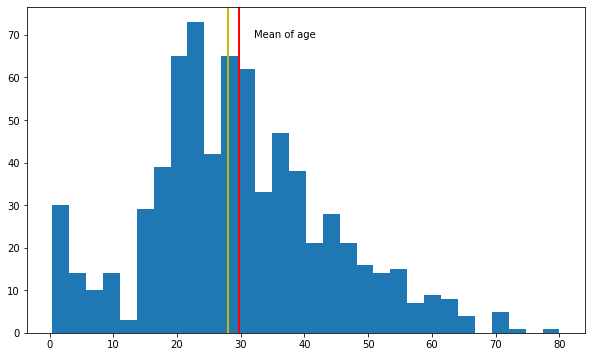

In [168]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# 데이터 불러오기
titanic = sns.load_dataset('titanic')
# 데이터 가공
age = titanic['age']

#데이터 시각화
fig, ax = plt.subplots(figsize = (10, 6))

# 메인 시각화 작성
ax.hist(age, bins = 30)

# 세부 그래프 추가
ax.axvline(x = age.mean(), linewidth = 2, color = 'r')
ax.axvline(x = age.median(), linewidth = 2, color = 'y')
ax.text(37, 70, 'Mean of age', horizontalalignment = 'center', verticalalignment = 'center')

# 그래프 출력
plt.show()